## Hackathon - Carreiras de TI - Curitiba/PR

### Contexto:

- Dataset contendo dados de qualidade do ar do Centro de monitoramento municipal do meio ambiente de Beijing, de março de 2013 à fevereiro de 2017.

- PM2.5 se refere a particulas atmosféricas que possuem diâmetro menor que 2.5 micrômetros, é uma medida de poluição.

### 1. Identificação do problema a resolver
- Analisar as variações na qualidade do ar em metrópole asiática através do comportamento dos poluentes particulados PM2.5 e PM10
- Variaveis a serem trabalhadas: Year, Month, PM2.5, PM10

### 2. Preparação dos datasets e exploração dos dados

In [1]:
# Importar as bibliotecas para fazer análise exploratória dos dados

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
import glob

In [3]:
# Extrair o conjunto de datasets e concatená-los em 1 arquivo 

path = r"C:\Users\Henrique.Min\Desktop\Temp\PRSA_Data" # Local onde se encontram os datasets
all_files = glob.glob(os.path.join(path,"*.csv"))      # Agrupamento dos datasets

df = pd.DataFrame()
list_ = []

for file_ in all_files:
    df = pd.read_csv(file_, index_col = None, header = 0)
    list_.append(df)
    
df = pd.concat(list_)

cols = ['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3',
        'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']

df = df[cols]
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [4]:
# Cria uma cópia do dframe
df_copy = df.copy()

In [5]:
df_copy.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [6]:
# Resumo do dataset por coluna: contagem, media, desvio padrão, vmin, vmax
df_copy.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [7]:
# Resumo de total de registros por coluna, tipo de dado, quantidade total de colunas, uso de memória
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420768 entries, 0 to 35063
Data columns (total 18 columns):
No         420768 non-null int64
year       420768 non-null int64
month      420768 non-null int64
day        420768 non-null int64
hour       420768 non-null int64
PM2.5      412029 non-null float64
PM10       414319 non-null float64
SO2        411747 non-null float64
NO2        408652 non-null float64
CO         400067 non-null float64
O3         407491 non-null float64
TEMP       420370 non-null float64
PRES       420375 non-null float64
DEWP       420365 non-null float64
RAIN       420378 non-null float64
wd         418946 non-null object
WSPM       420450 non-null float64
station    420768 non-null object
dtypes: float64(11), int64(5), object(2)
memory usage: 61.0+ MB


In [8]:
# Verificação de valores missing presentes por coluna
# Identificado valores missing de PM2.5 até WSPM
df_copy.isnull().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [11]:
# Descricao resumida da coluna PM2.5
df_copy['PM2.5'].describe()

count    412029.000000
mean         79.793428
std          80.822391
min           2.000000
25%          20.000000
50%          55.000000
75%         111.000000
max         999.000000
Name: PM2.5, dtype: float64

In [12]:
# Descricao resumida da coluna PM10
df_copy['PM10'].describe()

count    414319.000000
mean        104.602618
std          91.772426
min           2.000000
25%          36.000000
50%          82.000000
75%         145.000000
max         999.000000
Name: PM10, dtype: float64

In [13]:
# Descricao resumida da coluna TEMP
df_copy['TEMP'].describe()

count    420370.000000
mean         13.538976
std          11.436139
min         -19.900000
25%           3.100000
50%          14.500000
75%          23.300000
max          41.600000
Name: TEMP, dtype: float64

In [14]:
# Inserir valores missing para normalização de dados nas variáveis PM2.5 e PM10
df_copy['PM2.5'].fillna(df_copy['PM2.5'].median(), inplace = True)
df_copy['PM10'].fillna(df_copy['PM10'].median(), inplace = True)

In [15]:
# Verificando se valores missing foram preenchidos em PM2.5 e PM10
df_copy.isnull().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5          0
PM10           0
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [16]:
# Verificar se valores missing afetaram o resumo dos dados de PM2.5
# Valores missing aumentaram a contagem de registros,fez uma pequena alteração na média, desvio padrao e a frequencia de valores

df_copy['PM2.5'].describe()


count    420768.000000
mean         79.278489
std          80.056799
min           2.000000
25%          21.000000
50%          55.000000
75%         109.000000
max         999.000000
Name: PM2.5, dtype: float64

In [17]:
# Verificar se valores missing afetaram o resumo dos dados de PM10
# Valores missing aumentaram a contagem de registros,fez uma pequena alteração na média, desvio padrao e a frequencia de valores

df_copy['PM10'].describe()


count    420768.000000
mean        104.256193
std          91.108745
min           2.000000
25%          36.000000
50%          82.000000
75%         144.000000
max         999.000000
Name: PM10, dtype: float64

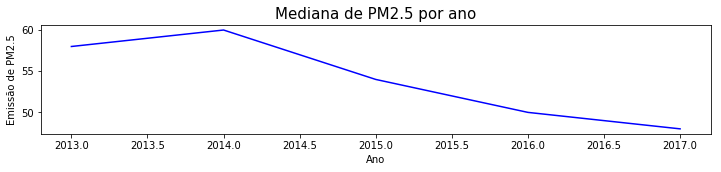

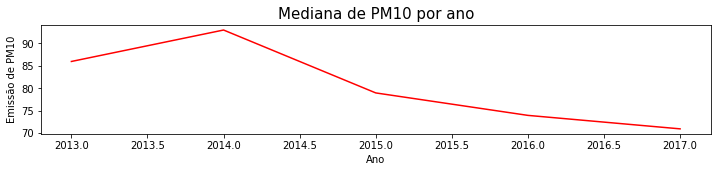

In [22]:
# Analiser histórico de emissões de PM2.5 e PM10 de todo o período do dataset
# 2014 foi o ano que apresentou maior nível de emissão de ambos os PMs
# PM2.5 variou de 50 a 60
df_year_PM25 = df_copy[['year', "PM2.5"]].groupby(['year']).median()
df_year_PM10 = df_copy[['year', 'PM10']].groupby(['year']).median()

fig, ax1 = plt.subplots(figsize=(12,2))
fig, ax2 = plt.subplots(figsize=(12,2))

ax1.plot(df_year_PM25, color = 'blue')
ax2.plot(df_year_PM10, color = 'red')

ax1.set_title('Mediana de PM2.5 por ano', fontsize = 15)
ax1.set_xlabel('Ano')
ax1.set_ylabel('Emissão de PM2.5')

ax2.set_title('Mediana de PM10 por ano', fontsize = 15)
ax2.set_xlabel('Ano')
ax2.set_ylabel('Emissão de PM10')

plt.show()

In [24]:
# Filtrar os anos de 2014 (ano de maior emissão) e 2016 (ano de menor emissão)
# Ano de 2017 apresenta apenas 2 meses, por isso não foi considerado para comparativo
df_2014 = df_copy[df_copy['year'] == 2014]
df_2016 = df_copy[df_copy['year'] == 2016]

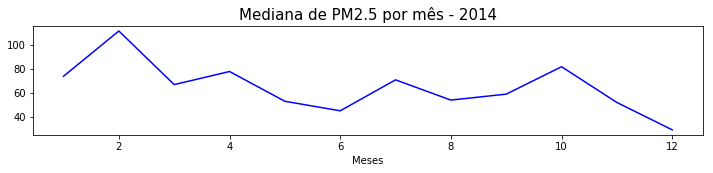

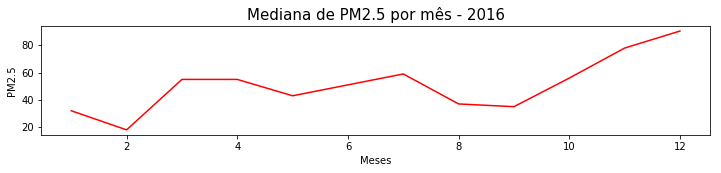

In [30]:
# Analisar emissão de PM2.5 no ano de 2014 e 2016 por mês
df_2014_PM25 = df_2014[['month', 'PM2.5']].groupby(['month']).median()
fig, ax1 = plt.subplots(figsize = (12,2))
ax1.plot(df_2014_PM25, color = 'blue')
ax1.set_title('Mediana de PM2.5 por mês - 2014', fontsize = 15)
ax1.set_xlabel('Meses')
ax2.set_ylabel('PM2.5')


df_2016_PM25 = df_2016[['month', 'PM2.5']].groupby(['month']).median()
fig, ax2 = plt.subplots(figsize = (12,2))
ax2.plot(df_2016_PM25, color = 'red')
ax2.set_title('Mediana de PM2.5 por mês - 2016', fontsize = 15)
ax2.set_xlabel('Meses')
ax2.set_ylabel('PM2.5')

plt.show()

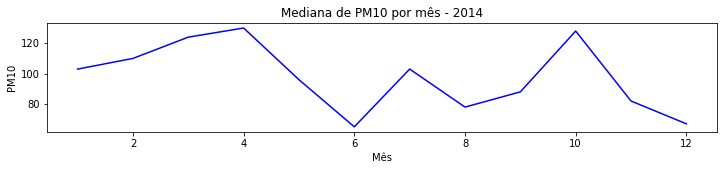

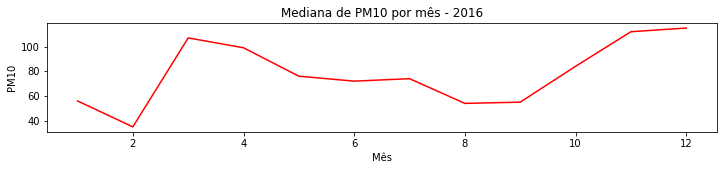

In [31]:
# Analisar emissão de PM10 no ano de 2014 e 2016 por mês
df_2014_PM10 = df_2014[['month','PM10']].groupby(['month']).median()
fig, ax1 = plt.subplots(figsize = (12,2))
ax1.plot(df_2014_PM10, color = 'blue')
ax1.set_title('Mediana de PM10 por mês - 2014')
ax1.set_xlabel('Mês')
ax1.set_ylabel('PM10')

df_2016_PM10 = df_2016[['month', 'PM10']].groupby(['month']).median()
fig, ax2 = plt.subplots(figsize =(12,2))
ax2.plot(df_2016_PM10, color = 'red')
ax2.set_title('Mediana de PM10 por mês - 2016')
ax2.set_xlabel('Mês')
ax2.set_ylabel('PM10')

plt.show()

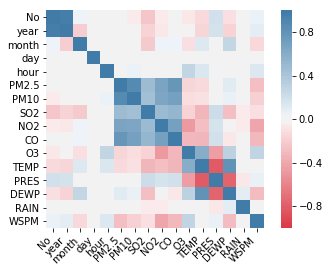

In [33]:
# Mapa de calor, identificando a correlação entre as variáveis
corr = df_copy.corr()
ax = sns.heatmap(corr, vmin = -1, vmax = 1, center = 0, cmap = sns.diverging_palette(10, 600, n =200), square = True)

ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right');

In [ ]:
# Comparativo de CO em 2014 e 2016 por mês
df_2014_co = df_2014[['month', 'CO']].groupby(['month']).median()
fig,ax1 = plt.subplots(figsize=(12,1.5))
ax1.plot(df_2014_co, color = 'blue')

ax1.set_title('Histórico CO - 2014')
ax1.set_xlabel('Meses')
ax1.set_ylabel('CO')

df_2016_co = df_2016[['month', 'CO']].groupby(['month']).median()
fig,ax1 = plt.subplots(figsize=(12,1.5))
ax1.plot(df_2016_co, color = 'red')

ax1.set_title('Histórico CO - 2016')
ax1.set_xlabel('Meses')
ax1.set_ylabel('CO')

plt.show()

### 3. Resultados

- Partículas PM2.5, PM10, SO2, NO2, CO apresentam correlação positiva.
- SO2, NO2, CO são gases tóxicos e tem grande parte de sua produção pela atividade industrial.
- Ano de 2014, maiores níveis de emissões de partículas foram no começo do ano.
- Já em 2016, maiores níveis de emossões de particulas foram no final do ano.